In [1]:
import numpy as np
import pandas as pd

import os

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load MINST data:

def load_minst(path):
    X = []
    y = []
    with open(path, 'r') as f:
        next(f)  # skip the header
        for line in f:
            yi, xi = line.split(',', 1)  # separates first line (labels)
            y.append(yi)
            X.append(xi.split(','))
        
    # Theano works with fp32 precision
    X = np.array(X).astype(np.float32)
    y = np.array(y).astype(np.float32)
    
    # Normalise the data
    X -= X.mean()
    X /= X.std()
    
    return X, y

In [3]:
X, y = load_minst('train.csv')

In [4]:
# check the shape of data
X.shape, y.shape

((42000, 784), (42000,))

In [5]:
# reshape data for plotting
X_plot = X.reshape(
            -1,  # number of samples, -1 makes it so that this number is determined automatically
        1,   # 1 color channel, since images are only black and white
        28,  # first image dimension (vertical)
        28,  # second image dimension (horizontal)
    )

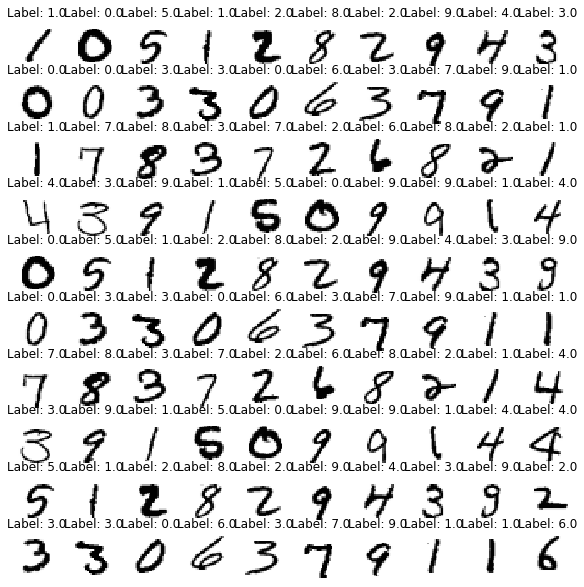

In [6]:
figs, axes = plt.subplots(10,10, figsize = (10,10))
for i in range(10):
    for j in range(10):
        axes[i,j].imshow(-X_plot[i + 4*j].reshape(28, 28), cmap='gray', interpolation='none')
        axes[i,j].set_xticks([])
        axes[i,j].set_yticks([])
        axes[i,j].set_title('Label: {}'.format(y[i + 4*j]))
        axes[i,j].axis('off')

In [7]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelBinarizer

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.regularizers import l2
from keras.optimizers import SGD
from keras.constraints import maxnorm
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

Using Theano backend.


In [ ]:
np.random.seed(290977)

# load data
X = pd.read_csv("train.csv")
y = X.label.values
X = X.drop(["label"], axis=1).values

test = pd.read_csv("test.csv").values

# separate training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2909)
X_train.shape, X_test.shape

((33600, 784), (8400, 784))

In [ ]:
mlp = Sequential()

mlp.add(Dense(500, input_dim=X_train.shape[1], activation="sigmoid"))
mlp.add(Dense(200, activation="sigmoid"))
mlp.add(Dense(10, activation="softmax"))

mlp.compile(loss="categorical_crossentropy", optimizer="sgd",metrics=['accuracy'])

lb = LabelBinarizer()
lb.fit(y_train)

early_stop = EarlyStopping(monitor="val_loss", patience=2, mode="min")

history = mlp.fit(
    X_train,
    lb.transform(y_train),
    nb_epoch = 30,
    validation_split=.2,
    callbacks=[early_stop]
)

print(mlp.evaluate(X_test, lb.transform(y_test), batch_size=16))

# use the NN model to classify test data
pred = mlp.predict_classes(test, verbose=1)

# save results
submission = pd.read_csv('sample_submission.csv')
submission['Label']= pred
submission.to_csv('submission_cnn_vanilla.csv',index=False)

Train on 26880 samples, validate on 6720 samples
Epoch 1/30
26880/26880 [==============================] - 32s - loss: 1.3030 - acc: 0.7372 - val_loss: 0.7390 - val_acc: 0.8570
Epoch 2/30
26880/26880 [==============================] - 32s - loss: 0.5715 - acc: 0.8789 - val_loss: 0.4760 - val_acc: 0.8874
Epoch 3/30
26880/26880 [==============================] - 34s - loss: 0.4063 - acc: 0.9023 - val_loss: 0.3842 - val_acc: 0.8987
Epoch 4/30
26880/26880 [==============================] - 31s - loss: 0.3373 - acc: 0.9149 - val_loss: 0.3399 - val_acc: 0.9076
Epoch 5/30
26880/26880 [==============================] - 30s - loss: 0.2946 - acc: 0.9231 - val_loss: 0.3119 - val_acc: 0.9119
Epoch 6/30
26880/26880 [==============================] - 29s - loss: 0.2660 - acc: 0.9282 - val_loss: 0.2869 - val_acc: 0.9176
Epoch 7/30
26880/26880 [==============================] - 30s - loss: 0.2442 - acc: 0.9346 - val_loss: 0.2715 - val_acc: 0.9223
Epoch 8/30
26880/26880 [==============================]

In [ ]:
mlp = Sequential()

mlp.add(Dense(500, input_dim=X_train.shape[1], activation="sigmoid"))
mlp.add(Dropout(0.5))
mlp.add(Dense(200, activation="sigmoid"))
mlp.add(Dropout(0.5))
mlp.add(Dense(10, activation="softmax"))

mlp.compile(loss="categorical_crossentropy", optimizer="sgd",metrics=['accuracy'])

lb = LabelBinarizer()
lb.fit(y_train)

early_stop = EarlyStopping(monitor="val_loss", patience=2, mode="min")

history = mlp.fit(
    X_train,
    lb.transform(y_train),
    nb_epoch = 60,
    validation_split=.2,
    callbacks=[early_stop]
)

print(mlp.evaluate(X_test, lb.transform(y_test), batch_size=16))

# use the NN model to classify test data
pred = mlp.predict_classes(test, verbose=1)

# save results
submission = pd.read_csv('sample_submission.csv')
submission['Label']= pred
submission.to_csv('submission_cnn_dropout.csv',index=False)

26880/26880 [==============================] - 37s - loss: 0.3234 - acc: 0.9033 - val_loss: 0.2438 - val_acc: 0.9284
Epoch 21/60
26880/26880 [==============================] - 33s - loss: 0.3216 - acc: 0.9046 - val_loss: 0.2399 - val_acc: 0.9284
Epoch 22/60
26880/26880 [==============================] - 32s - loss: 0.3112 - acc: 0.9058 - val_loss: 0.2345 - val_acc: 0.9313
Epoch 23/60
26880/26880 [==============================] - 31s - loss: 0.3045 - acc: 0.9081 - val_loss: 0.2329 - val_acc: 0.9281
Epoch 24/60
26880/26880 [==============================] - 31s - loss: 0.3005 - acc: 0.9101 - val_loss: 0.2307 - val_acc: 0.9318
Epoch 25/60
26880/26880 [==============================] - 30s - loss: 0.2993 - acc: 0.9110 - val_loss: 0.2277 - val_acc: 0.9308
Epoch 26/60
26880/26880 [==============================] - 30s - loss: 0.2914 - acc: 0.9131 - val_loss: 0.2219 - val_acc: 0.9336
Epoch 27/60
26880/26880 [==============================] - 30s - loss: 0.2856 - acc: 0.9151 - val_loss: 0.219

In [ ]:
# second model (tanh activation instead of sigmoid)
# prepare network
mlp = Sequential()

mlp.add(Dense(500, input_dim=X_train.shape[1], activation="tanh"))
mlp.add(Dense(200, activation="tanh"))
mlp.add(Dense(10, activation="softmax"))


mlp.compile(loss="categorical_crossentropy", optimizer="sgd",metrics=['accuracy'])

lb = LabelBinarizer()
lb.fit(y_train)

early_stop = EarlyStopping(monitor="val_loss", patience=2, mode="min")


history = mlp.fit(
    X_train,
    lb.transform(y_train),
    nb_epoch = 20,
    validation_split=.2,
    callbacks=[early_stop]
)

print
print(mlp.evaluate(X_test, lb.transform(y_test), batch_size=16))

Train on 26880 samples, validate on 6720 samples
Epoch 1/20
 4992/26880 [====>.........................] - ETA: 14s - loss: 1.0311 - acc: 0.6997

In [ ]:
# second model (bigger architecture, more neurons per layer)
# prepare network
mlp = Sequential()

mlp.add(Dense(1024, input_dim=X_train.shape[1], activation="sigmoid"))
mlp.add(Dense(1024, activation="sigmoid"))
mlp.add(Dense(10, activation="softmax"))

mlp.compile(loss="categorical_crossentropy", optimizer="sgd",metrics=['accuracy'])

lb = LabelBinarizer()
lb.fit(y_train)

early_stop = EarlyStopping(monitor="val_loss", patience=2, mode="min")

history = mlp.fit(
    X_train,
    lb.transform(y_train),
    nb_epoch = 20,
    validation_split=.2,
    callbacks=[early_stop]
)

print
print(mlp.evaluate(X_test, lb.transform(y_test), batch_size=16))

# use the NN model to classify test data
pred = mlp.predict_classes(test, verbose=1)

# save results
submission = pd.read_csv('sample_submission.csv')
submission['Label']= pred
submission.to_csv('submission_cnn_bigger.csv',index=False)

26880/26880 [==============================] - 83s - loss: 0.3254 - acc: 0.9145 - val_loss: 0.3202 - val_acc: 0.9124
Epoch 4/20
26880/26880 [==============================] - 86s - loss: 0.2725 - acc: 0.9263 - val_loss: 0.2946 - val_acc: 0.9137
Epoch 5/20
26880/26880 [==============================] - 87s - loss: 0.2394 - acc: 0.9346 - val_loss: 0.2703 - val_acc: 0.9234
Epoch 6/20
26880/26880 [==============================] - 92s - loss: 0.2148 - acc: 0.9407 - val_loss: 0.2493 - val_acc: 0.9293
Epoch 7/20
26880/26880 [==============================] - 90s - loss: 0.1939 - acc: 0.9469 - val_loss: 0.2358 - val_acc: 0.9329
Epoch 8/20
26880/26880 [==============================] - 90s - loss: 0.1776 - acc: 0.9513 - val_loss: 0.2230 - val_acc: 0.9368
Epoch 9/20
26880/26880 [==============================] - 91s - loss: 0.1624 - acc: 0.9559 - val_loss: 0.2153 - val_acc: 0.9378
Epoch 10/20
26880/26880 [==============================] - 91s - loss: 0.1501 - acc: 0.9588 - val_loss: 0.2073 - va

In [ ]:
# second model (bigger architecture, more neurons per layer)
# prepare network
mlp = Sequential()

mlp.add(Dense(1024, input_dim=X_train.shape[1], activation="sigmoid"))
mlp.add(Dropout(0.5))
mlp.add(Dense(1024, activation="sigmoid"))
mlp.add(Dropout(0.5))
mlp.add(Dense(10, activation="softmax"))

mlp.compile(loss="categorical_crossentropy", optimizer="sgd",metrics=['accuracy'])

lb = LabelBinarizer()
lb.fit(y_train)

early_stop = EarlyStopping(monitor="val_loss", patience=2, mode="min")

history = mlp.fit(
    X_train,
    lb.transform(y_train),
    nb_epoch = 100,
    validation_split=.2,
    callbacks=[early_stop]
)

print
print(mlp.evaluate(X_test, lb.transform(y_test), batch_size=16))

# use the NN model to classify test data
pred = mlp.predict_classes(test, verbose=1)

# save results
submission = pd.read_csv('sample_submission.csv')
submission['Label']= pred
submission.to_csv('submission_cnn_bigger_dropout.csv',index=False)

In [ ]:
pred

In [ ]:
mlp = Sequential()

# add first hidden layer of 1024 neurones
mlp.add(Dense(1024, input_dim=X_train.shape[1], 
                        init='uniform', activation='sigmoid', weights=None,
                        W_regularizer=l2(0.01), b_regularizer=None,
                        activity_regularizer=None, W_constraint=maxnorm(2),
                        b_constraint=None, bias=True))
model.add(Dropout(0.5))


# add second hidden layer 0f 1024 neurons
model.add(Dense(1024, init='uniform', activation='sigmoid', weights=None,
                        W_regularizer=l2(0.01), b_regularizer=None,
                        activity_regularizer=None, W_constraint=maxnorm(2),
                        b_constraint=None, bias=True))
model.add(Dropout(0.5))

# add output layer
model.add(Dense(10, batch_input_shape = (None, 784), 
                        init='uniform', activation='softmax', weights=None,
                        W_regularizer=l2(0.01), b_regularizer=None,
                        activity_regularizer=None, W_constraint=maxnorm(2),
                        b_constraint=None, bias=True))
model.add(Dropout(0.5))

model.compile(loss="categorical_crossentropy", optimizer="sgd",metrics=['accuracy'])


early_stop = EarlyStopping(monitor="val_loss", patience=2, mode="min")

history = model.fit(
    X_train,
    lb.transform(y_train),
    nb_epoch = 100,
    validation_split=.2,
    callbacks=[early_stop]
)

print
print(model.evaluate(X_test, lb.transform(y_test), batch_size=16))

# use the NN model to classify test data
pred = mlp.predict_classes(test, verbose=1)

# save results
submission = pd.read_csv('sample_submission.csv')
submission['Label']= pred
submission.to_csv('submission_cnn_regularized.csv',index=False)